In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
######
renewableData = pd.read_csv("/Users/lucasmazza/Desktop/RenewableEnergyData/01 renewable-share-energy.csv")


In [5]:
#filter down to the United States, United Kingdom, China and Russia
renewableData['Entity'] = renewableData['Entity'].astype(str)
selected_countries = ['United States', 'United Kingdom', 'China', 'Russia','India','Canada']
selected_data = renewableData[renewableData['Entity'].isin(selected_countries)]

In [36]:
#understanding the data: 
    #Entity: is the name of the contry
    #Code: code for the country 
    #Year: year studied - Updated to 2021
    #Renewables (% equivalent primary energy): The value for this indicator represents the percentage of energy consumed from renewable sources relative to the total energy consumed from all sources

<bound method Series.unique of 0       1965
1       1966
2       1967
3       1968
4       1969
        ... 
5598    2017
5599    2018
5600    2019
5601    2020
5602    2021
Name: Year, Length: 5603, dtype: int64>


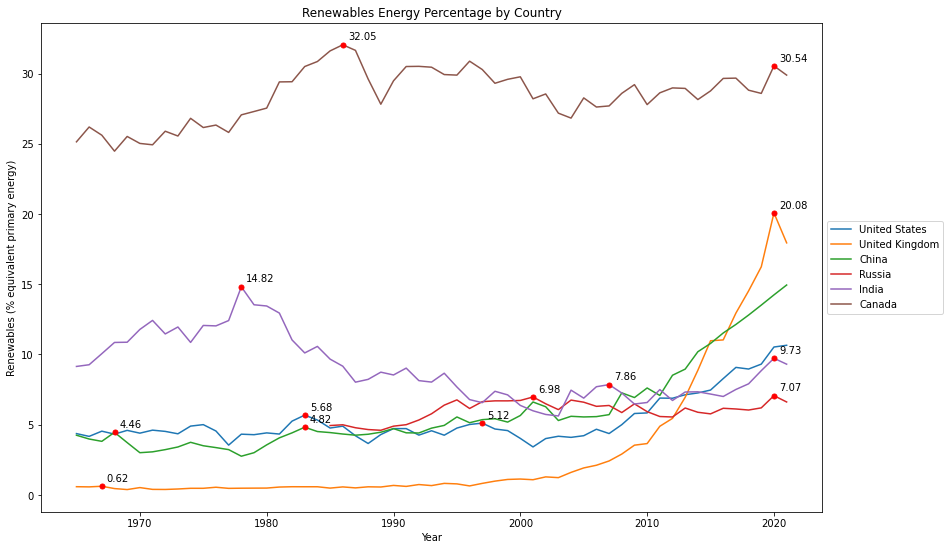

In [34]:
fig, ax = plt.subplots(figsize = (14,9))

for country in selected_countries:
    country_data = selected_data[selected_data['Entity'] == country]
    ax.plot(country_data['Year'], country_data['Renewables (% equivalent primary energy)'], label=country)
       # Find peaks using scipy.signal.argrelextrema
     # Find peaks using scipy.signal.argrelextrema
    peaks = argrelextrema(country_data['Renewables (% equivalent primary energy)'].values, comparator=np.greater, order=10)

    # Plot peaks as red markers
    ax.plot(country_data['Year'].values[peaks], country_data['Renewables (% equivalent primary energy)'].values[peaks],
            'ro', markersize=5)
    # Mark numerical values of the peaks
    peak_values = country_data['Renewables (% equivalent primary energy)'].values[peaks]
    for year, value in zip(country_data['Year'].values[peaks], peak_values):
        ax.annotate(f'{value:.2f}', xy=(year, value), xytext=(5, 5), textcoords='offset points')
# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Renewables (% equivalent primary energy)')
ax.set_title('Renewables Energy Percentage by Country')

# Move the legend to the side
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the chart
plt.tight_layout
plt.show()


In [42]:
#identifying the biggest year to year jump for each country
jumps = {}
biggest_jumps = {}
selected_countries = ['United States', 'United Kingdom', 'China', 'Russia','India','Canada']
for country in selected_countries:
    country_data = selected_data[selected_data['Entity'] == country].copy()
    country_data['Renewable_Jump'] = country_data['Renewables (% equivalent primary energy)'].diff()
    max_jump = country_data['Renewable_Jump'].max()
    max_jump_year = country_data.loc[country_data['Renewable_Jump'].idxmax(), 'Year']
    biggest_jumps[country] = (max_jump_year, max_jump)

for country, (year, jump) in biggest_jumps.items():
    print(f"Biggest jump in renewable energy for {country}: {jump:.2f}% in {year}")





Biggest jump in renewable energy for United States: 1.22% in 2020
Biggest jump in renewable energy for United Kingdom: 3.84% in 2020
Biggest jump in renewable energy for China: 1.55% in 2008
Biggest jump in renewable energy for Russia: 0.87% in 2020
Biggest jump in renewable energy for India: 2.40% in 1978
Biggest jump in renewable energy for Canada: 1.96% in 2020


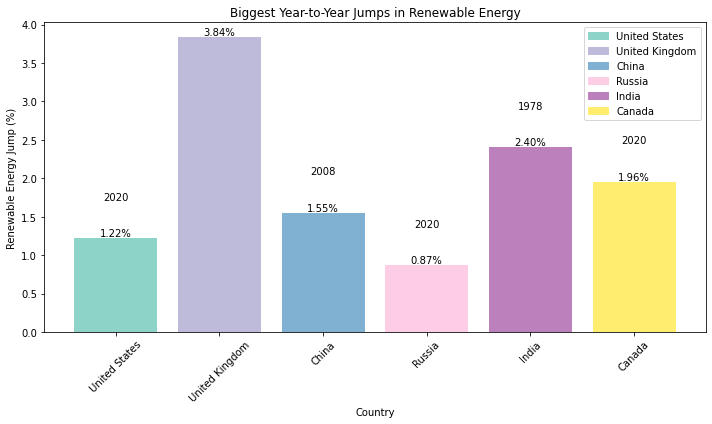

In [43]:
import matplotlib.pyplot as plt
import numpy as np

countries = list(biggest_jumps.keys())
jumps = [jump for _, jump in biggest_jumps.values()]
years = [year for year, _ in biggest_jumps.values()]

# Generate a color palette with a different color for each bar
color_palette = plt.cm.get_cmap('Set3', len(countries))

plt.figure(figsize=(10, 6))
bars = plt.bar(countries, jumps, color=color_palette(np.arange(len(countries))))
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Renewable Energy Jump (%)')
plt.title('Biggest Year-to-Year Jumps in Renewable Energy')

# Add data labels
for i, jump in enumerate(jumps):
    plt.text(i, jump, f'{jump:.2f}%', ha='center', va='bottom')

# Add annotations with year information
for i, year in enumerate(years):
    plt.annotate(year, (i, jumps[i] + 0.5), ha='center')

# Customize the legend to show the corresponding colors
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color_palette(i)) for i in range(len(countries))]
plt.legend(legend_handles, countries, loc='upper right')

plt.tight_layout()
plt.show()


In [44]:
jumps = {}
smallest_jumps = {}

for country in selected_countries:
    country_data = selected_data[selected_data['Entity'] == country].copy()
    country_data['Renewable_Jump'] = country_data['Renewables (% equivalent primary energy)'].diff()
    min_jump = country_data['Renewable_Jump'].min()
    min_jump_year = country_data.loc[country_data['Renewable_Jump'].idxmin(), 'Year']
    smallest_jumps[country] = (min_jump_year, min_jump)

for country, (year, jump) in smallest_jumps.items():
    print(f"Smallest jump in renewable energy for {country}: {jump:.2f}% in {year}")


Smallest jump in renewable energy for United States: -1.00% in 1977
Smallest jump in renewable energy for United Kingdom: -2.13% in 2021
Smallest jump in renewable energy for China: -0.98% in 2003
Smallest jump in renewable energy for Russia: -0.61% in 1996
Smallest jump in renewable energy for India: -1.91% in 1982
Smallest jump in renewable energy for Canada: -2.04% in 1988


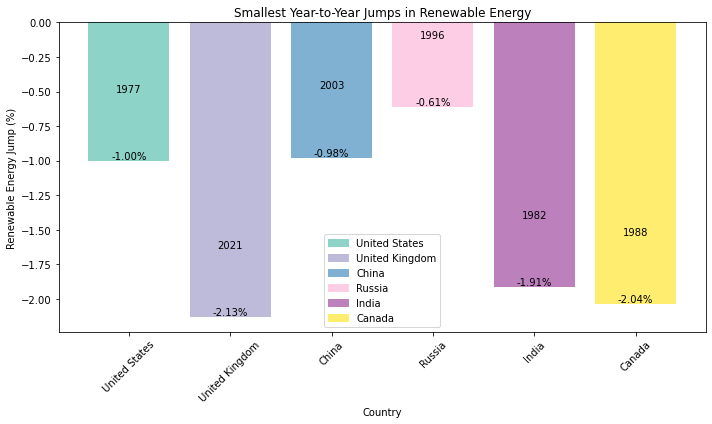

In [46]:
import matplotlib.pyplot as plt
import numpy as np

countries = list(biggest_jumps.keys())
jumps = [jump for _, jump in smallest_jumps.values()]
years = [year for year, _ in smallest_jumps.values()]

# Generate a color palette with a different color for each bar
color_palette = plt.cm.get_cmap('Set3', len(countries))

plt.figure(figsize=(10, 6))
bars = plt.bar(countries, jumps, color=color_palette(np.arange(len(countries))))
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Renewable Energy Jump (%)')
plt.title('Smallest Year-to-Year Jumps in Renewable Energy')

# Add data labels
for i, jump in enumerate(jumps):
    plt.text(i, jump, f'{jump:.2f}%', ha='center', va='bottom')

# Add annotations with year information
for i, year in enumerate(years):
    plt.annotate(year, (i, jumps[i] + 0.5), ha='center')

# Customize the legend to show the corresponding colors
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color_palette(i)) for i in range(len(countries))]
plt.legend(legend_handles, countries, loc='lower center')

plt.tight_layout()
plt.show()


In [49]:
#Amount of energy produced per renewable category: 
renewType = pd.read_csv("/Users/lucasmazza/Desktop/RenewableEnergyData/02 modern-renewable-energy-consumption.csv")
#select relavant countries

In [50]:
#filter down to the United States, United Kingdom, China and Russia
renewType['Entity'] = renewType['Entity'].astype(str)
renewType = renewType[renewType['Entity'].isin(selected_countries)]

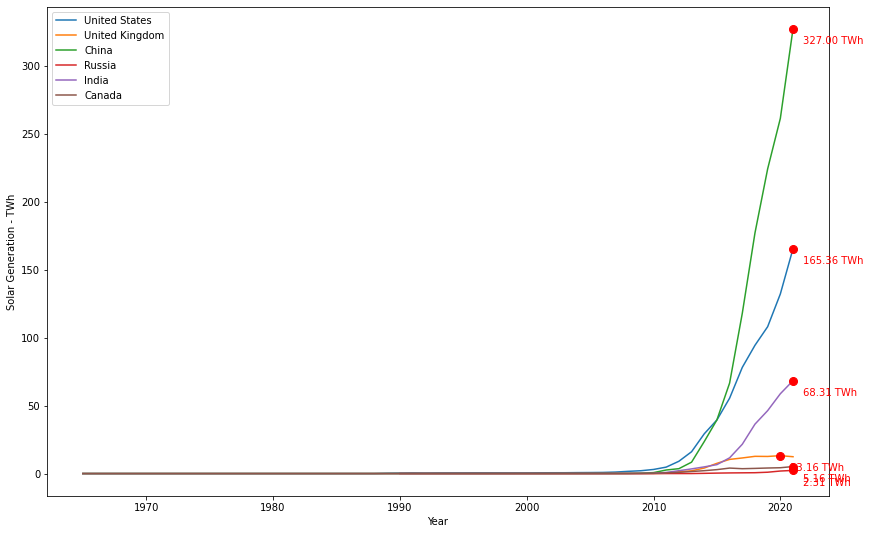

In [51]:
#countries Solar generation

fig, ax = plt.subplots(figsize = (14,9))
countries = ['United States', 'United Kingdom', 'China', 'Russia','India','Canada']
solar_data = renewType[renewType['Entity'].isin(countries)]
#solar_data = filtered_data[(filtered_data['Year'] >= 2005) & (filtered_data['Year'] <= 2021)]


for country in countries:
    country_data = solar_data[solar_data['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Solar Generation - TWh'], label=country)
     # Find the maximum value and its index
    max_value = country_data['Solar Generation - TWh'].max()
    max_index = country_data['Solar Generation - TWh'].idxmax()
    
    # Mark the maximum value with a red dot
    plt.plot(country_data.loc[max_index, 'Year'], max_value, 'ro', markersize=8)
    
    # Annotate the maximum value
    plt.annotate(f"{max_value:.2f} TWh", (country_data.loc[max_index, 'Year'], max_value),
                 xytext=(10, -15), textcoords='offset points', color='red')
    

plt.xlabel('Year')
plt.ylabel('Solar Generation - TWh')
plt.legend()
plt.show()


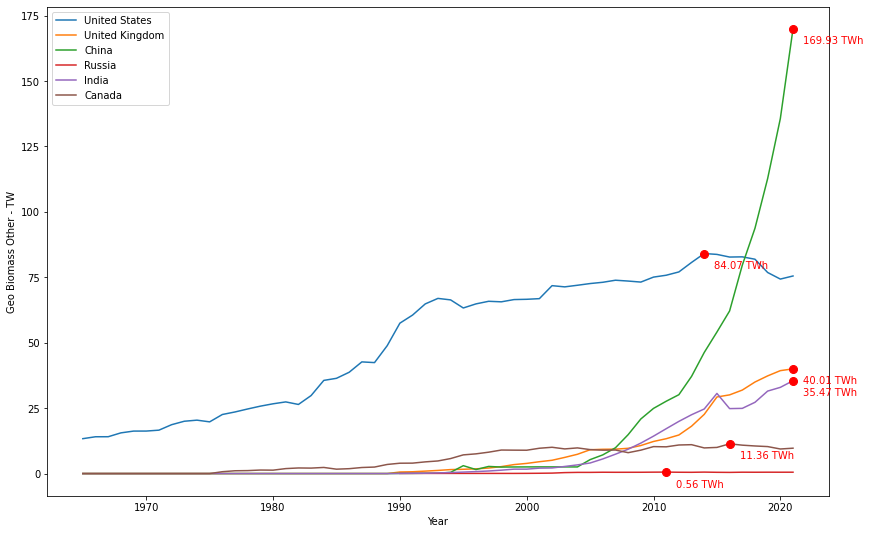

In [52]:
fig, ax = plt.subplots(figsize = (14,9))

filtered_data = renewType[renewType['Entity'].isin(countries)]
#solar_data = filtered_data[(filtered_data['Year'] >= 2005) & (filtered_data['Year'] <= 2021)]


for country in countries:
    country_data = filtered_data[filtered_data['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Geo Biomass Other - TWh'], label=country)
     # Find the maximum value and its index
    max_value = country_data['Geo Biomass Other - TWh'].max()
    max_index = country_data['Geo Biomass Other - TWh'].idxmax()
    
    # Mark the maximum value with a red dot
    plt.plot(country_data.loc[max_index, 'Year'], max_value, 'ro', markersize=8)
    
    # Annotate the maximum value
    plt.annotate(f"{max_value:.2f} TWh", (country_data.loc[max_index, 'Year'], max_value),
                 xytext=(10, -15), textcoords='offset points', color='red')
    

plt.xlabel('Year')
plt.ylabel('Geo Biomass Other - TW')
plt.legend()
plt.show()

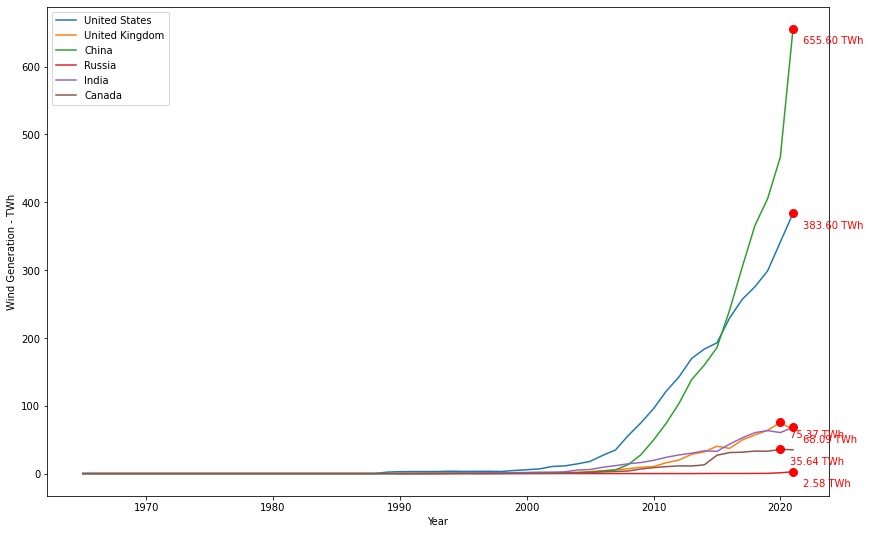

In [53]:
fig, ax = plt.subplots(figsize = (14,9))

filtered_data = renewType[renewType['Entity'].isin(countries)]
#solar_data = filtered_data[(filtered_data['Year'] >= 2005) & (filtered_data['Year'] <= 2021)]


for country in countries:
    country_data = filtered_data[filtered_data['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Wind Generation - TWh'], label=country)
     # Find the maximum value and its index
    max_value = country_data['Wind Generation - TWh'].max()
    max_index = country_data['Wind Generation - TWh'].idxmax()
    
    # Mark the maximum value with a red dot
    plt.plot(country_data.loc[max_index, 'Year'], max_value, 'ro', markersize=8)
    
    # Annotate the maximum value
    plt.annotate(f"{max_value:.2f} TWh", (country_data.loc[max_index, 'Year'], max_value),
                 xytext=(10, -15), textcoords='offset points', color='red')
    

plt.xlabel('Year')
plt.ylabel('Wind Generation - TWh')
plt.legend()
plt.show()

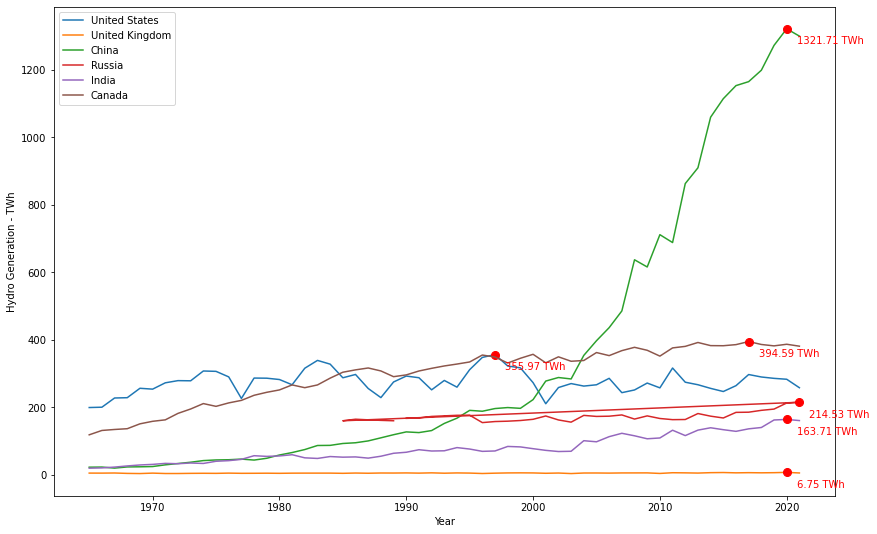

In [54]:
fig, ax = plt.subplots(figsize = (14,9))

filtered_data = renewType[renewType['Entity'].isin(countries)]
#solar_data = filtered_data[(filtered_data['Year'] >= 2005) & (filtered_data['Year'] <= 2021)]


for country in countries:
    country_data = filtered_data[filtered_data['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Hydro Generation - TWh'], label=country)
     # Find the maximum value and its index
    max_value = country_data['Hydro Generation - TWh'].max()
    max_index = country_data['Hydro Generation - TWh'].idxmax()
    
    # Mark the maximum value with a red dot
    plt.plot(country_data.loc[max_index, 'Year'], max_value, 'ro', markersize=8)
    
    # Annotate the maximum value
    plt.annotate(f"{max_value:.2f} TWh", (country_data.loc[max_index, 'Year'], max_value),
                 xytext=(10, -15), textcoords='offset points', color='red')
    

plt.xlabel('Year')
plt.ylabel('Hydro Generation - TWh')
plt.legend()
plt.show()

In [3]:
#solar capacity: 
solarCap = pd.read_csv("/Users/lucasmazza/Desktop/RenewableEnergyData/13 installed-solar-PV-capacity.csv")
display(solarCap)

,Entity,Code,Year,Solar Capacity
0,Africa,NaN,1996,0.001112
1,Africa,NaN,1997,0.003137
2,Africa,NaN,1998,0.005162
3,Africa,NaN,1999,0.008199
4,Africa,NaN,2000,0.010927
...,...,...,...,...
1654,World,OWID_WRL,2017,390.206530
1655,World,OWID_WRL,2018,483.011800
1656,World,OWID_WRL,2019,584.685700
1657,World,OWID_WRL,2020,710.281100


In [6]:
#filter down to the United States, United Kingdom, China and Russia
solarCap['Entity'] = solarCap['Entity'].astype(str)

solarCap = solarCap[solarCap['Entity'].isin(selected_countries)]

(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)


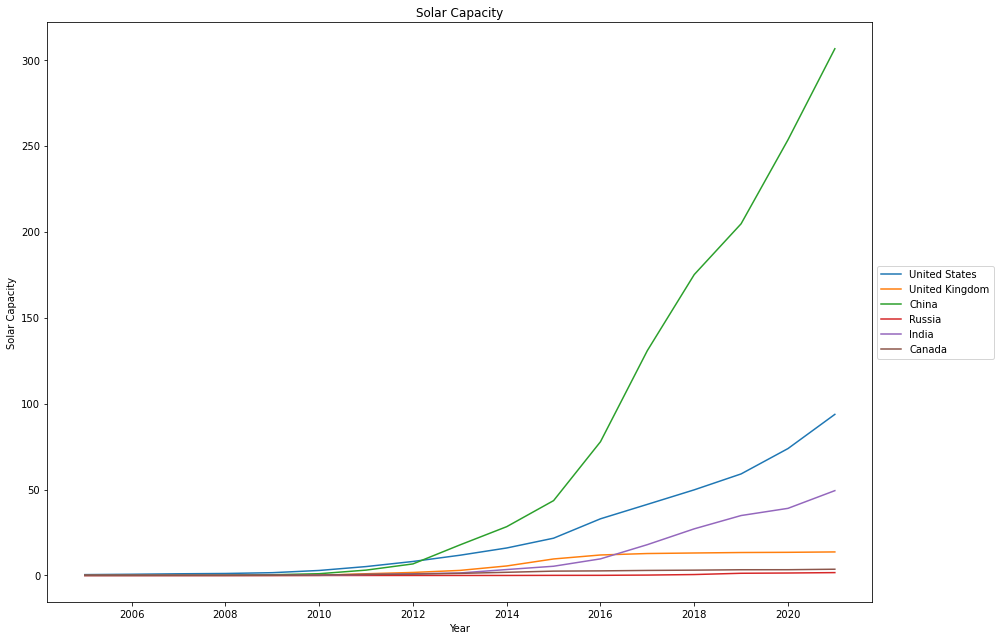

In [55]:


fig, ax = plt.subplots(figsize=(14, 9))

solarCap = solarCap[(solarCap['Year'] >= 2005) & (solarCap['Year'] <= 2021)]
for country in selected_countries:
    country_data = solarCap[solarCap['Entity'] == country]
   
    ax.plot(country_data['Year'], country_data['Solar Capacity'], label=country)
    
    # Find peaks using scipy.signal.argrelextrema
    peaks = argrelextrema(country_data['Solar Capacity'].values, np.greater, order=10)
    print(peaks)
    # Plot peaks as red markers
    ax.plot(country_data['Year'].values[peaks], country_data['Solar Capacity'].values[peaks],
            'ro', markersize=5)
    

# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Solar Capacity')
ax.set_title('Solar Capacity')

# Move the legend tao the side
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the chart
plt.tight_layout()
plt.show()


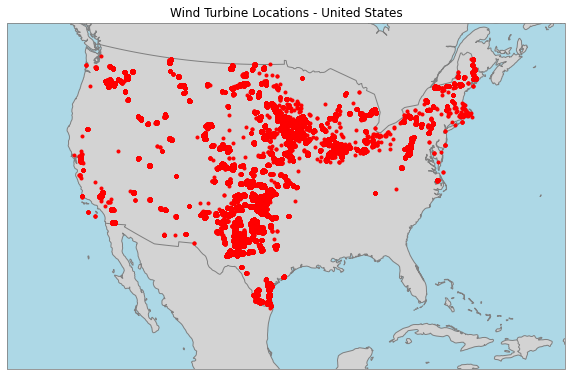

In [9]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

windturbData = pd.read_csv("/Users/lucasmazza/Desktop/RenewableEnergyData/uswtdb_v6_0_20230531.csv")

xlong = windturbData['xlong']
ylat = windturbData['ylat']

# Create a Cartopy map
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.AlbersEqualArea(central_longitude=-98, central_latitude=39)})

# Customize the map style
ax.set_facecolor('lightblue')
ax.spines['geo'].set_edgecolor('gray')

# Add map features
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.BORDERS, edgecolor='gray')

# Plot wind turbine locations
ax.plot(xlong, ylat, 'ro', markersize=3, transform=ccrs.PlateCarree())

# Set map extent to cover the contiguous United States
ax.set_extent([-125, -66.5, 20, 50], crs=ccrs.PlateCarree())

# Add a title
plt.title('Wind Turbine Locations - United States')

# Display the map
plt.show()


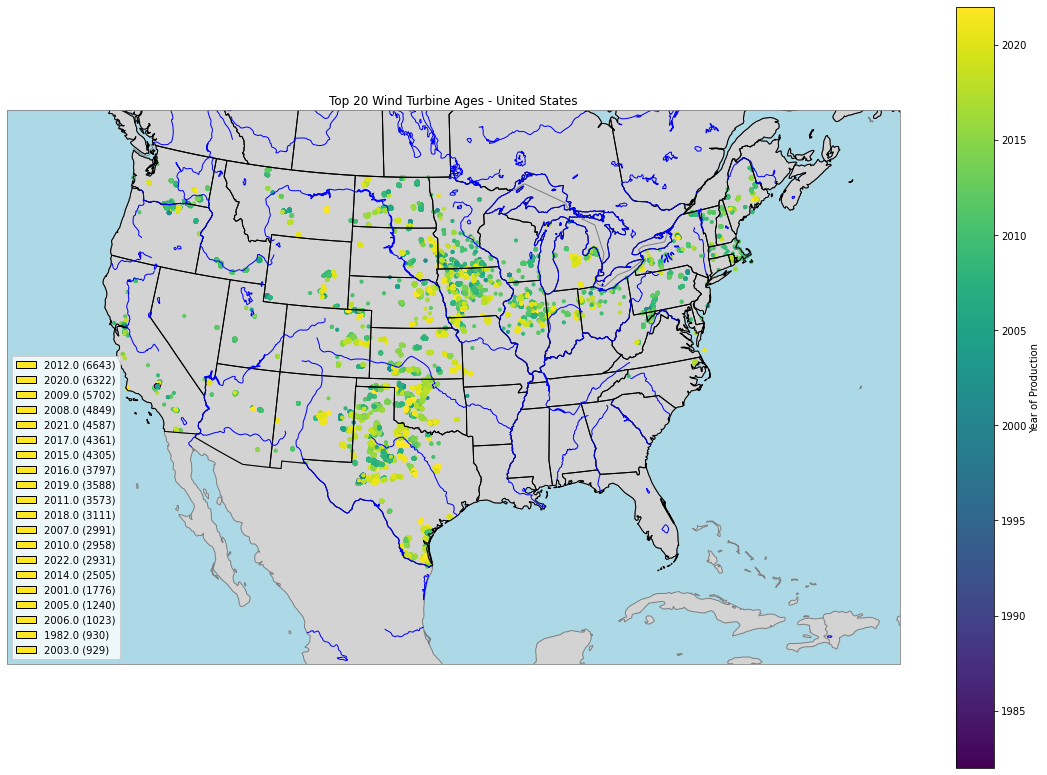

In [67]:
import cartopy.feature as cfeature
from matplotlib.patches import Patch

p_year = windturbData['p_year']

# Get the top 10 years with the highest number of turbines
top_10_years = p_year.value_counts().nlargest(20).index.tolist()

# Filter the data to include only the top 10 years
filtered_data = windturbData[p_year.isin(top_10_years)]

# Define colormap for the years
cmap = plt.cm.get_cmap('viridis')  # Choose a colormap, e.g., 'viridis'
# Create a dictionary to store the number of turbines for each manufacturer
turbine_counts = filtered_data['p_year'].value_counts().to_dict()

# Create a Cartopy map
fig, ax = plt.subplots(figsize=(20, 14), subplot_kw={'projection': ccrs.AlbersEqualArea(central_longitude=-98, central_latitude=39)})

# Customize the map style
ax.set_facecolor('lightblue')
ax.spines['geo'].set_edgecolor('gray')

# Add map features
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.BORDERS, edgecolor='gray')

# Add state lines
ax.add_feature(cfeature.STATES, edgecolor='black')

# Add rivers
ax.add_feature(cfeature.RIVERS, edgecolor='blue', facecolor='none')

# Add lakes
ax.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='none')

# Add cities
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural', name='populated_places', scale='10m', facecolor='gray'))

# Plot wind turbine locations with color based on p_year
sc = ax.scatter(filtered_data['xlong'], filtered_data['ylat'], c=filtered_data['p_year'], cmap=cmap, s=10, transform=ccrs.PlateCarree())

# Set map extent to cover the contiguous United States
ax.set_extent([-125, -66.5, 20, 50], crs=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(sc, ax=ax, label='Year of Production')

# Create a custom legend for the number of turbines in each age group
legend_elements = [Patch(facecolor=cmap(p), edgecolor='black', label=f'{p} ({turbine_counts[p]})') for p in top_10_years]
ax.legend(handles=legend_elements, loc='lower left')

# Add a title
plt.title('Top 20 Wind Turbine Ages - United States')

# Display the map
plt.show()


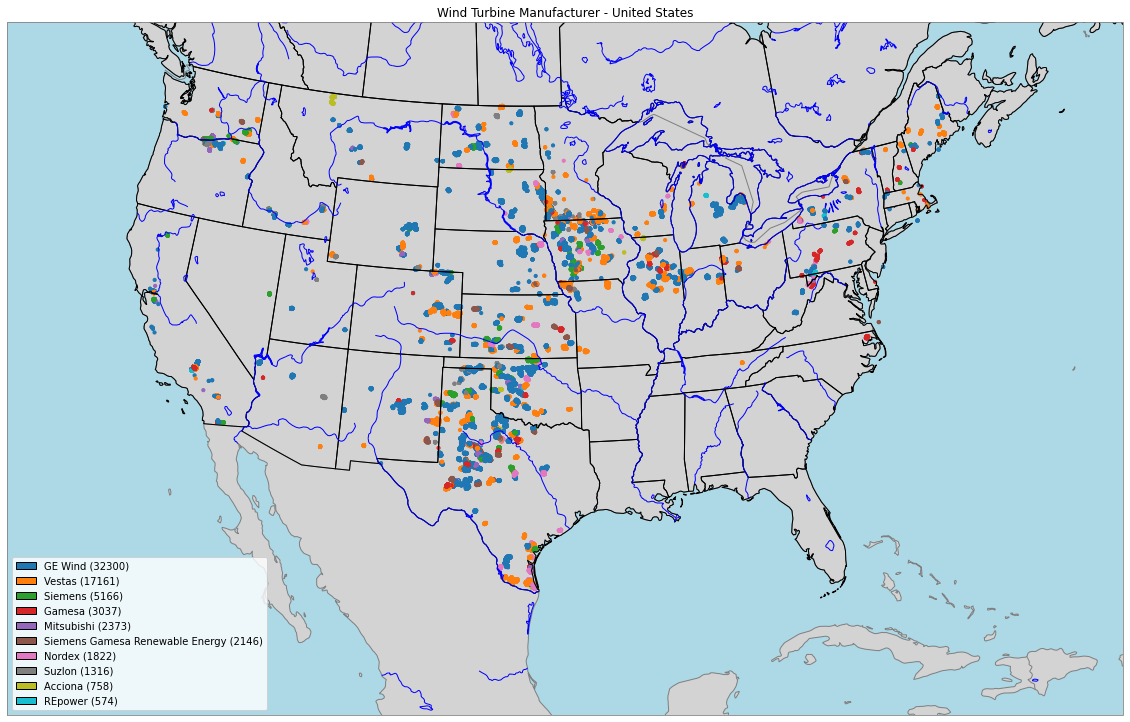

In [62]:
import cartopy.feature as cfeature
from matplotlib.patches import Patch

manu = windturbData['t_manu']

# Determine the number of top manufacturers to display in the legend
top_n = 10  # Choose the desired number of top manufacturers

# Get the top N most frequent manufacturers
top_manufacturers = manu.value_counts().nlargest(top_n).index

# Filter the data based on the top manufacturers
filtered_data = windturbData[windturbData['t_manu'].isin(top_manufacturers)]

# Create a colormap for the manufacturers
cmap = plt.cm.get_cmap('tab10', len(top_manufacturers))

# Create a dictionary to map each manufacturer to a unique color index
manu_colors = {manu_val: i for i, manu_val in enumerate(top_manufacturers)}

# Convert the manufacturer names to color indices
manu_color_indices = filtered_data['t_manu'].map(manu_colors)

# Create a dictionary to store the number of turbines for each manufacturer
turbine_counts = filtered_data['t_manu'].value_counts().to_dict()

# Create a Cartopy map
fig, ax = plt.subplots(figsize=(20, 14), subplot_kw={'projection': ccrs.AlbersEqualArea(central_longitude=-98, central_latitude=39)})

# Customize the map style
ax.set_facecolor('lightblue')
ax.spines['geo'].set_edgecolor('gray')

# Add map features
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.BORDERS, edgecolor='gray')

# Add state lines
ax.add_feature(cfeature.STATES, edgecolor='black')

# Add rivers
ax.add_feature(cfeature.RIVERS, edgecolor='blue', facecolor='none')

# Add lakes
ax.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='none')

# Add cities
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural', name='populated_places', scale='10m', facecolor='gray'))

# Plot wind turbine locations with color based on manufacturer
sc = ax.scatter(filtered_data['xlong'], filtered_data['ylat'], c=manu_color_indices, cmap=cmap, s=10, transform=ccrs.PlateCarree())

# Set map extent to cover the contiguous United States
ax.set_extent([-125, -66.5, 20, 50], crs=ccrs.PlateCarree())

# Create a custom legend for the manufacturers with turbine counts
legend_elements = [Patch(facecolor=cmap(i), edgecolor='black', label=f'{manu_val} ({turbine_counts[manu_val]})') for manu_val, i in manu_colors.items()]
ax.legend(handles=legend_elements, loc='lower left')

# Add a title
plt.title('Wind Turbine Manufacturer - United States')

# Display the map
plt.show()


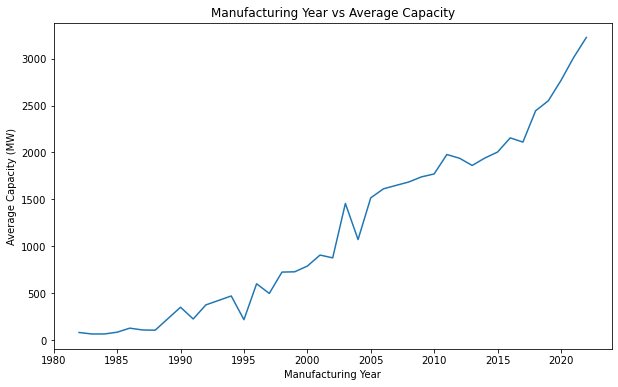

In [73]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter the data for non-null values of p_year and t_cap
filtered_data = windturbData.dropna(subset=['p_year', 't_cap'])

# Group the data by p_year and calculate the average t_cap for each year
yearly_avg_capacity = filtered_data.groupby('p_year')['t_cap'].mean()

# Sort the data based on the manufacturing year
sorted_data = yearly_avg_capacity.sort_index()

# Create the line plot
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(sorted_data.index, sorted_data.values)

ax.set_xlabel('Manufacturing Year')
ax.set_ylabel('Average Capacity (MW)')
ax.set_title('Manufacturing Year vs Average Capacity')

plt.show()


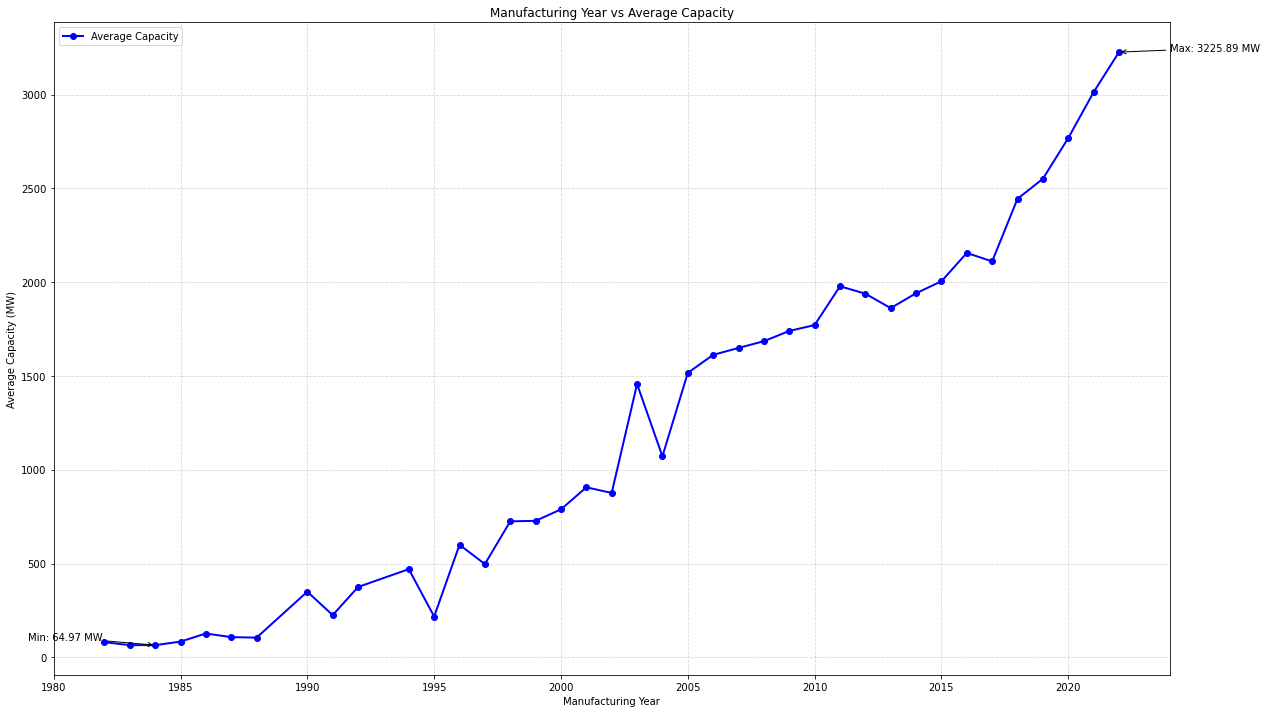

In [91]:

# Filter the data for non-null values of p_year and t_cap
filtered_data = windturbData.dropna(subset=['p_year', 't_cap'])

# Group the data by p_year and calculate the average t_cap for each year
yearly_avg_capacity = filtered_data.groupby('p_year')['t_cap'].mean()

# Sort the data based on the manufacturing year
sorted_data = yearly_avg_capacity.sort_index()

# Create the line plot
fig, ax = plt.subplots(figsize=(20, 12))

# Plot the line with markers
ax.plot(sorted_data.index, sorted_data.values, marker='o', markersize=6, color='blue', linewidth=2)

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.5)

# Add legend
ax.legend(['Average Capacity'], loc='upper left')

# Add annotations for maximum and minimum capacity
max_capacity = sorted_data.max()
min_capacity = sorted_data.min()
ax.annotate(f'Max: {max_capacity:.2f} MW', xy=(sorted_data.idxmax(), max_capacity),
            xytext=(sorted_data.idxmax() + 2, max_capacity + 5), arrowprops=dict(facecolor='black', arrowstyle='->'))
ax.annotate(f'Min: {min_capacity:.2f} MW', xy=(sorted_data.idxmin(), min_capacity),
            xytext=(sorted_data.idxmin() - 5, min_capacity +25), arrowprops=dict(facecolor='black', arrowstyle='->'))

ax.set_xlabel('Manufacturing Year')
ax.set_ylabel('Average Capacity (MW)')
ax.set_title('Manufacturing Year vs Average Capacity')

plt.show()


In [92]:
#Wind speed hotspots in the US 
windSpeed = pd.read_csv("/Users/lucasmazza/Desktop/wind-prospector/Wind_Speed_Annual/Wind_Speed_Annual.csv")

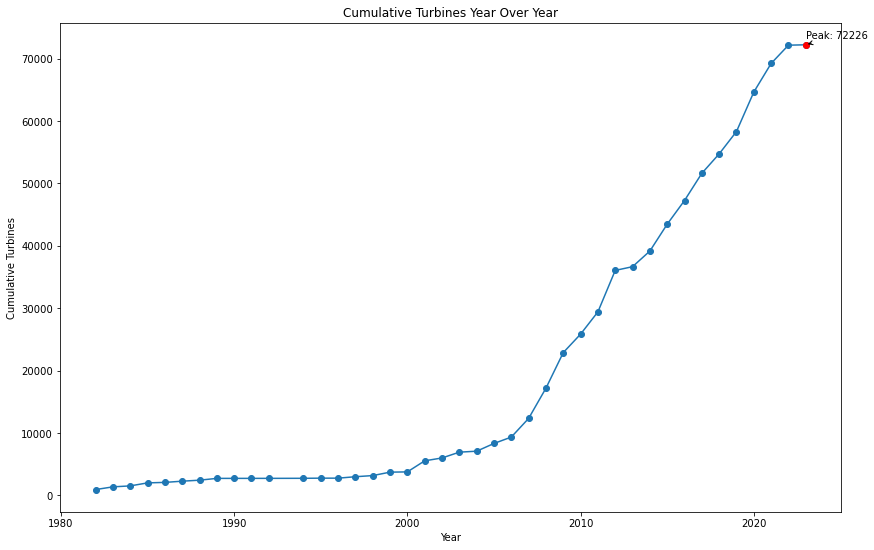

In [98]:
fig, ax = plt.subplots(figsize = (14,9))
# Calculate the cumulative sum of turbines year over year
cumulative_turbines = windturbData['p_year'].value_counts().sort_index().cumsum()



# Create a line plot of the cumulative sum
plt.plot(cumulative_turbines.index, cumulative_turbines.values, marker='o')



# Find the index of the peak value
peak_index = cumulative_turbines.idxmax()

# Mark the peak with a red dot
plt.plot(peak_index, cumulative_turbines[peak_index], marker='o', color='red')

# Annotate the peak value
plt.annotate(f"Peak: {cumulative_turbines[peak_index]}", xy=(peak_index, cumulative_turbines[peak_index]),
             xytext=(peak_index, cumulative_turbines[peak_index] + 1000),
             arrowprops=dict(arrowstyle='->'))

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Cumulative Turbines')
plt.title('Cumulative Turbines Year Over Year')

# Display the plot
plt.show()


In [99]:
turbineWind = pd.read_csv("/Users/lucasmazza/Desktop/T1.csv")


<bound method NDFrame.head of               Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0      01 01 2018 00:00           380.047791          5.311336   
1      01 01 2018 00:10           453.769196          5.672167   
2      01 01 2018 00:20           306.376587          5.216037   
3      01 01 2018 00:30           419.645905          5.659674   
4      01 01 2018 00:40           380.650696          5.577941   
...                 ...                  ...               ...   
50525  31 12 2018 23:10          2963.980957         11.404030   
50526  31 12 2018 23:20          1684.353027          7.332648   
50527  31 12 2018 23:30          2201.106934          8.435358   
50528  31 12 2018 23:40          2515.694092          9.421366   
50529  31 12 2018 23:50          2820.466064          9.979332   

       Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                         416.328908          259.994904  
1                         519.917511          268.641113  


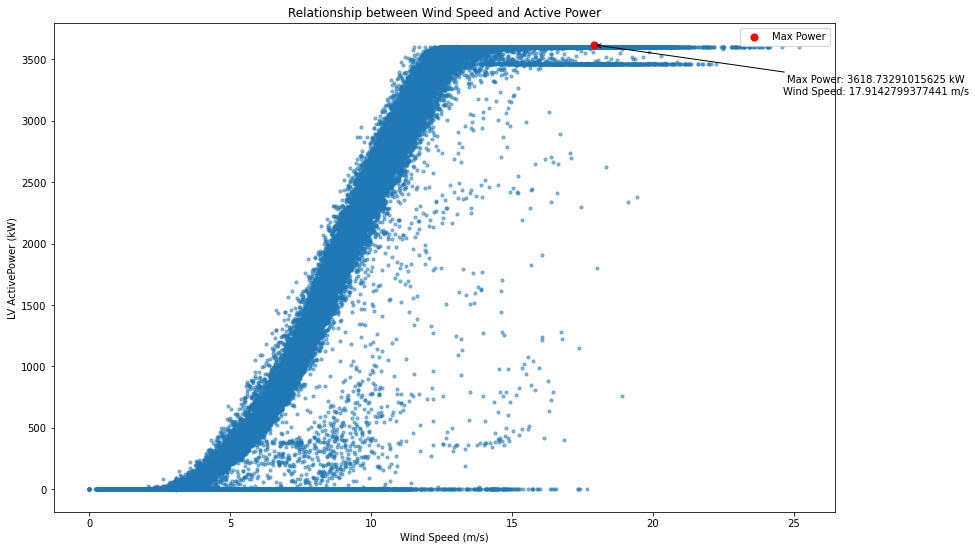

In [142]:
wind_speed = turbineWind['Wind Speed (m/s)']
active_power = turbineWind['LV ActivePower (kW)']

# Sample a subset of data points

fig, ax = plt.subplots(figsize = (14,9))
# Find the maximum point
max_power_index = np.argmax(active_power)
max_power_speed = wind_speed[max_power_index]
max_power_value = active_power[max_power_index]

# Adjust marker transparency and size
plt.scatter(wind_speed, active_power, alpha=0.5, s=10)



# Mark the maximum point
plt.scatter(max_power_speed, max_power_value, color='red', s=50, label='Max Power')
# Annotate the maximum point
annotation_text = f"Max Power: {max_power_value} kW\nWind Speed: {max_power_speed} m/s"
plt.annotate(annotation_text, xy=(max_power_speed, max_power_value), xytext=(max_power_speed+10, max_power_value-400),
             arrowprops=dict(facecolor='black', arrowstyle='->'), ha='center')



plt.xlabel('Wind Speed (m/s)')
plt.ylabel('LV ActivePower (kW)')
plt.title('Relationship between Wind Speed and Active Power')
plt.legend()
plt.show()







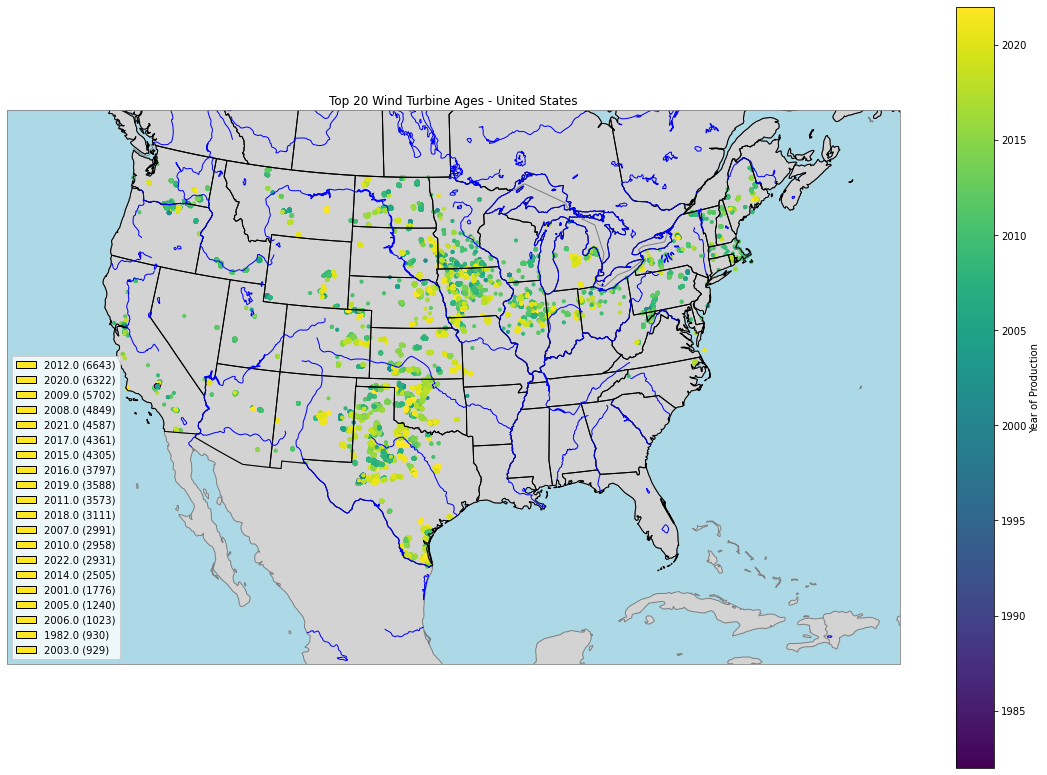

In [ ]:
import cartopy.feature as cfeature
from matplotlib.patches import Patch

p_year = windturbData['p_year']

# Get the top 10 years with the highest number of turbines
top_10_years = p_year.value_counts().nlargest(20).index.tolist()

# Filter the data to include only the top 10 years
filtered_data = windturbData[p_year.isin(top_10_years)]

# Define colormap for the years
cmap = plt.cm.get_cmap('viridis')  # Choose a colormap, e.g., 'viridis'
# Create a dictionary to store the number of turbines for each manufacturer
turbine_counts = filtered_data['p_year'].value_counts().to_dict()

# Create a Cartopy map
fig, ax = plt.subplots(figsize=(20, 14), subplot_kw={'projection': ccrs.AlbersEqualArea(central_longitude=-98, central_latitude=39)})

# Customize the map style
ax.set_facecolor('lightblue')
ax.spines['geo'].set_edgecolor('gray')

# Add map features
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.BORDERS, edgecolor='gray')

# Add state lines
ax.add_feature(cfeature.STATES, edgecolor='black')

# Add rivers
ax.add_feature(cfeature.RIVERS, edgecolor='blue', facecolor='none')

# Add lakes
ax.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='none')

# Add cities
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural', name='populated_places', scale='10m', facecolor='gray'))

# Plot wind turbine locations with color based on p_year
sc = ax.scatter(filtered_data['xlong'], filtered_data['ylat'], c=filtered_data['p_year'], cmap=cmap, s=10, transform=ccrs.PlateCarree())

# Set map extent to cover the contiguous United States
ax.set_extent([-125, -66.5, 20, 50], crs=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(sc, ax=ax, label='Year of Production')

# Create a custom legend for the number of turbines in each age group
legend_elements = [Patch(facecolor=cmap(p), edgecolor='black', label=f'{p} ({turbine_counts[p]})') for p in top_10_years]
ax.legend(handles=legend_elements, loc='lower left')

# Add a title
plt.title('Top 20 Wind Turbine Ages - United States')

# Display the map
plt.show()


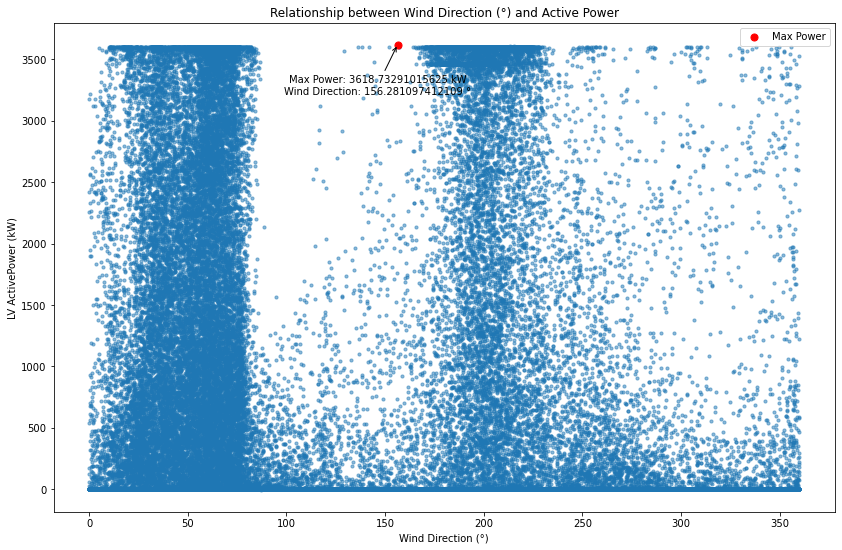

In [137]:
wind_direction = turbineWind['Wind Direction (°)']
active_power = turbineWind['LV ActivePower (kW)']

# Sample a subset of data points

fig, ax = plt.subplots(figsize = (14,9))
# Find the maximum point
max_power_index = np.argmax(active_power)
max_power_speed = wind_direction[max_power_index]
max_power_value = active_power[max_power_index]

# Adjust marker transparency and size
plt.scatter(wind_direction, active_power, alpha=0.5, s=10)



# Mark the maximum point
plt.scatter(max_power_speed, max_power_value, color='red', s=50, label='Max Power')
# Annotate the maximum point
annotation_text = f"Max Power: {max_power_value} kW\nWind Direction: {max_power_speed} °"
plt.annotate(annotation_text, xy=(max_power_speed, max_power_value), xytext=(max_power_speed-10, max_power_value-400),
             arrowprops=dict(facecolor='black', arrowstyle='->'), ha='center')

plt.xlabel('Wind Direction (°)')
plt.ylabel('LV ActivePower (kW)')
plt.title('Relationship between Wind Direction (°) and Active Power')
plt.legend()
plt.show()



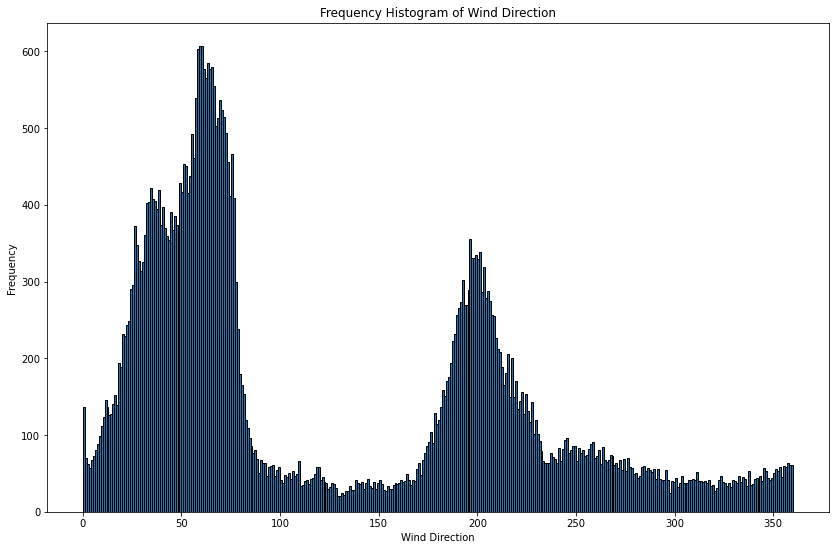

In [133]:

fig, ax = plt.subplots(figsize = (14,9))
# Convert wind_direction to integers
wind_direction = [int(d) for d in wind_direction]

# Create a histogram
plt.hist(wind_direction, bins=range(min(wind_direction), max(wind_direction) + 2), edgecolor='black')

# Set labels and title
plt.xlabel('Wind Direction')
plt.ylabel('Frequency')
plt.title('Frequency Histogram of Wind Direction')

# Display the histogram
plt.show()

In [129]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Extract the features and target variable
X = turbineWind[['Wind Speed (m/s)', 'Wind Direction (°)']]
y = turbineWind['LV ActivePower (kW)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an MLR model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate error metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Get the coefficient values and the intercept
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
intercept = model.intercept_

# Print the model summary
print("Multiple Linear Regression Model Summary:")
print("-----------------------------------------")
print("Intercept: ", intercept)
print(coefficients)
print("-----------------------------------------")
print("Mean Squared Error (MSE): ", mse)
print("R-squared (R2) Score: ", r2)


Multiple Linear Regression Model Summary:
-----------------------------------------
Intercept:  -846.6881212054457
                    Coefficient
Wind Speed (m/s)     283.326159
Wind Direction (°)     0.110085
-----------------------------------------
Mean Squared Error (MSE):  292576.0527769832
R-squared (R2) Score:  0.8285330649911159


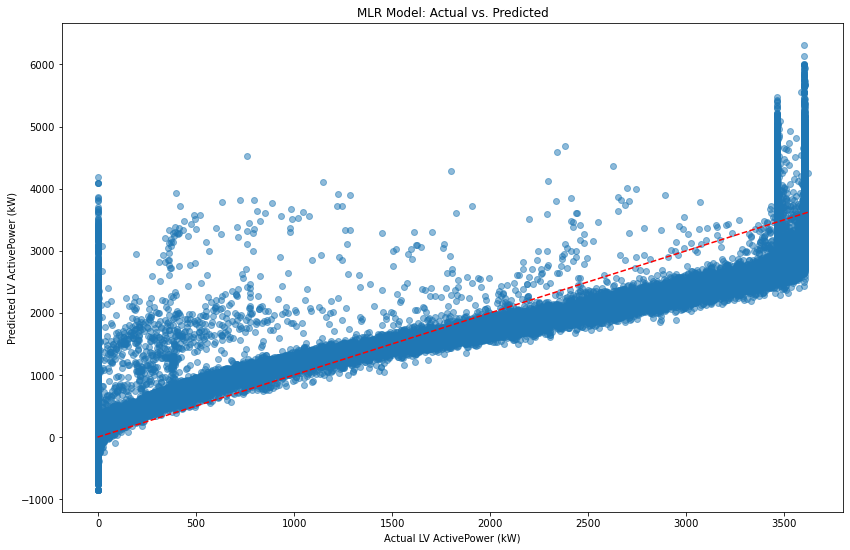

In [128]:
fig, ax = plt.subplots(figsize = (14,9))

# Make predictions on the entire dataset
y_pred = model.predict(X)

# Plot the predicted values against the actual values
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')  # Add a diagonal line for reference
plt.xlabel('Actual LV ActivePower (kW)')
plt.ylabel('Predicted LV ActivePower (kW)')
plt.title('MLR Model: Actual vs. Predicted')
plt.show()


In [145]:
# Convert the date column to datetime
turbineWind['Date/Time'] = pd.to_datetime(turbineWind['Date/Time'], format='%d %m %Y %H:%M')

# Find the minimum and maximum dates
min_date = turbineWind['Date/Time'].min()
max_date = turbineWind['Date/Time'].max()

# Calculate the time difference
time_difference = max_date - min_date
print(time_difference)

364 days 23:50:00


In [146]:
# Calculate the average energy produced for each combination of wind speed and direction
average_energy = turbineWind.groupby(['Wind Speed (m/s)', 'Wind Direction (°)'])['LV ActivePower (kW)'].mean()

# Find the combination with the highest average energy production
optimal_conditions = average_energy.idxmax()
optimal_wind_speed, optimal_wind_direction = optimal_conditions

# Print the optimal conditions
print('Optimal Wind Speed:', optimal_wind_speed, 'm/s')
print('Optimal Wind Direction:', optimal_wind_direction, 'degrees')

Optimal Wind Speed: 17.9142799377441 m/s
Optimal Wind Direction: 156.281097412109 degrees


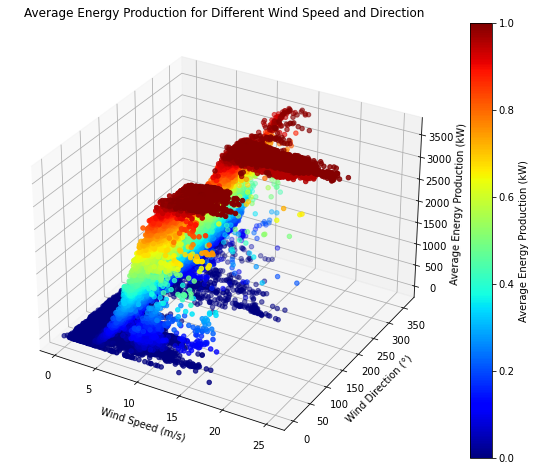

In [148]:
# Calculate the average energy produced for each combination of wind speed and direction
average_energy = turbineWind.groupby(['Wind Speed (m/s)', 'Wind Direction (°)'])['LV ActivePower (kW)'].mean().reset_index()

# Plot the results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of wind speed, wind direction, and average energy
ax.scatter(average_energy['Wind Speed (m/s)'], average_energy['Wind Direction (°)'], average_energy['LV ActivePower (kW)'],
           c=average_energy['LV ActivePower (kW)'], cmap='jet')

# Set labels and title
ax.set_xlabel('Wind Speed (m/s)')
ax.set_ylabel('Wind Direction (°)')
ax.set_zlabel('Average Energy Production (kW)')
ax.set_title('Average Energy Production for Different Wind Speed and Direction')

# Add a color bar
cbar = plt.colorbar(ax.scatter([], [], [], c=[], cmap='jet'))
cbar.set_label('Average Energy Production (kW)')

# Show the plot
plt.show()